In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv('wine-clustering.csv')
display(df.head(5))
print(df.info())
print(df.describe())
print(df.columns)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None
          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
co

In [34]:
display(df.isnull().sum())
display(df.nunique)
df.shape

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

<bound method DataFrame.nunique of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hu

(178, 13)

In [35]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


None

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


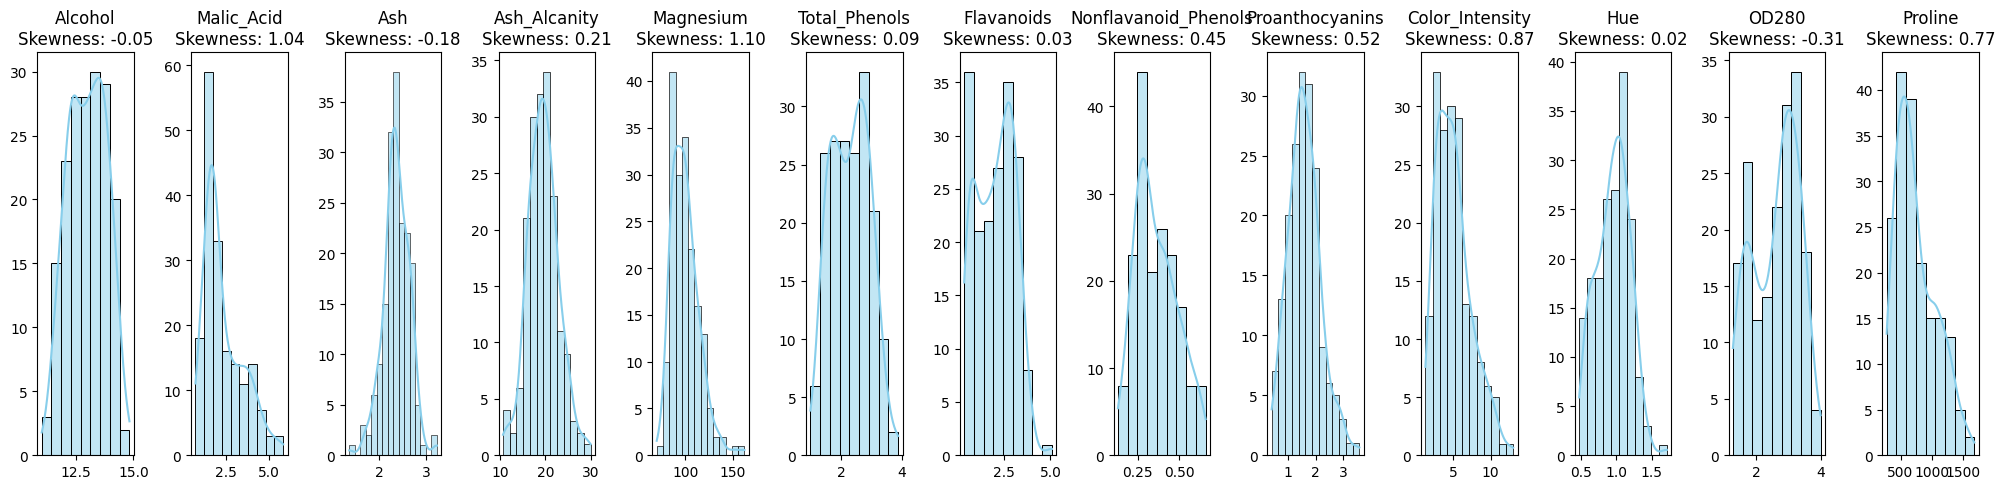

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col}\nSkewness: {df[col].skew():.2f}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import PowerTransformer

numeric_cols = ['Malic_Acid','Magnesium','Proanthocyanins','Color_Intensity','Proline']

pt = PowerTransformer(method='yeo-johnson')

df_skewed_corrected = df.copy()
df_skewed_corrected[numeric_cols] = pt.fit_transform(df[numeric_cols])

print("Skewness BEFORE correction:")
print(df[numeric_cols].skew())
print("\nSkewness AFTER correction:")
print(df_skewed_corrected[numeric_cols].skew())

Skewness BEFORE correction:
Malic_Acid         1.039651
Magnesium          1.098191
Proanthocyanins    0.517137
Color_Intensity    0.868585
Proline            0.767822
dtype: float64

Skewness AFTER correction:
Malic_Acid         0.073007
Magnesium          0.006539
Proanthocyanins    0.000528
Color_Intensity    0.009866
Proline            0.012218
dtype: float64


Alcohol                 0
Malic_Acid              3
Ash                     3
Ash_Alcanity            4
Magnesium               4
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         2
Color_Intensity         4
Hue                     1
OD280                   0
Proline                 0
dtype: int64


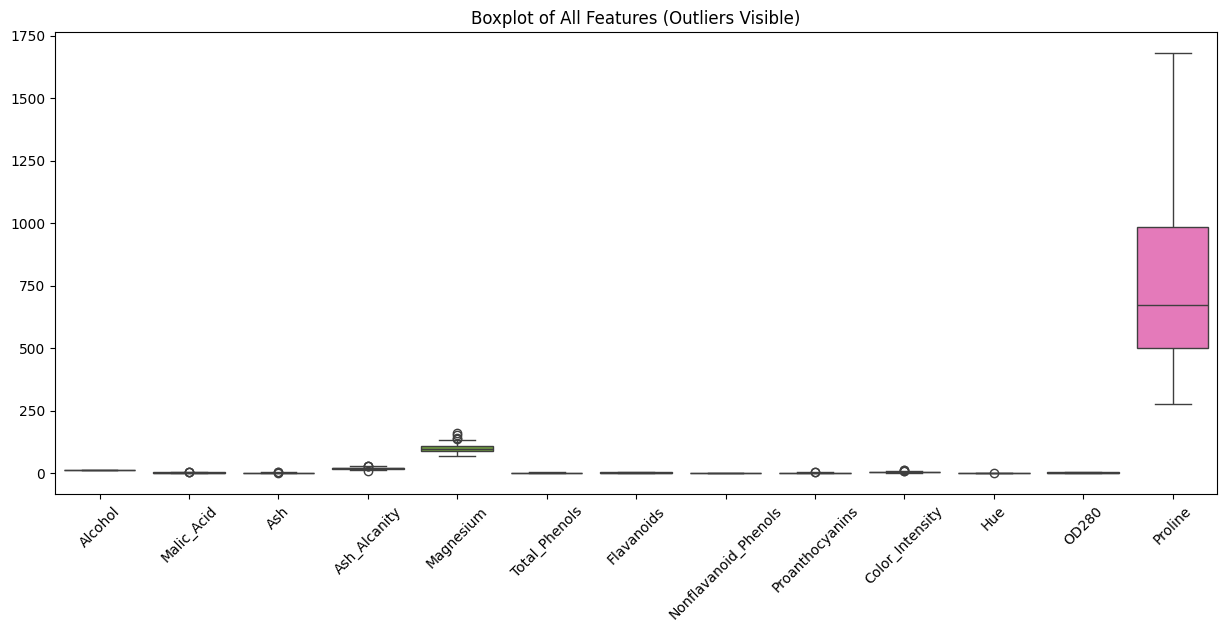

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print(outliers.sum())  # Number of outliers in each column

numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 6))

sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of All Features (Outliers Visible)")
plt.show()

In [39]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_mask = (df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))

print("Outlier count BEFORE removal:")
print(outliers_mask.sum())

df_no_outliers = df[~outliers_mask.any(axis=1)]

outliers_mask_after = (df_no_outliers[num_cols] < (Q1 - 1.5 * IQR)) | (df_no_outliers[num_cols] > (Q3 + 1.5 * IQR))

print("\nOutlier count AFTER removal:")
print(outliers_mask_after.sum())

print("\nOriginal dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)
print("Total rows removed:", df.shape[0] - df_no_outliers.shape[0])


Outlier count BEFORE removal:
Alcohol                 0
Malic_Acid              3
Ash                     3
Ash_Alcanity            4
Magnesium               4
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         2
Color_Intensity         4
Hue                     1
OD280                   0
Proline                 0
dtype: int64

Outlier count AFTER removal:
Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Original dataset shape: (178, 13)
Dataset shape after removing outliers: (161, 13)
Total rows removed: 17


In [40]:
# Calculate variance of all numerical columns
variance = df.var()

print("Variance of each column:\n")
print(variance)


Variance of each column:

Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64


FEATURE SELECTION IS BASED ON VARIANCE IN CLUSTERING , HIGH VARIANCE IS SELECTED AS FEATURES.

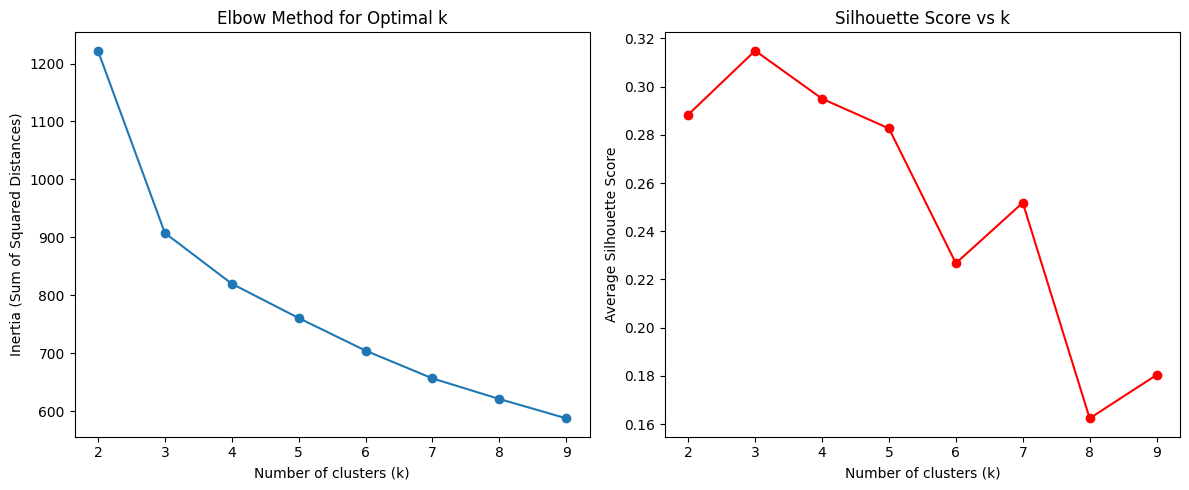

Best k (highest Silhouette Score): 3


In [46]:
inertia = []           
sil_scores = []       
range_n_clusters = range(2, 10)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_) 
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(list(range_n_clusters), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1,2,2)
plt.plot(list(range_n_clusters), sil_scores, marker='o', color='red')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

best_k = range_n_clusters[sil_scores.index(max(sil_scores))]
print(f"Best k (highest Silhouette Score): {best_k}")    

KMeans Silhouette Score: 0.31485677825484515


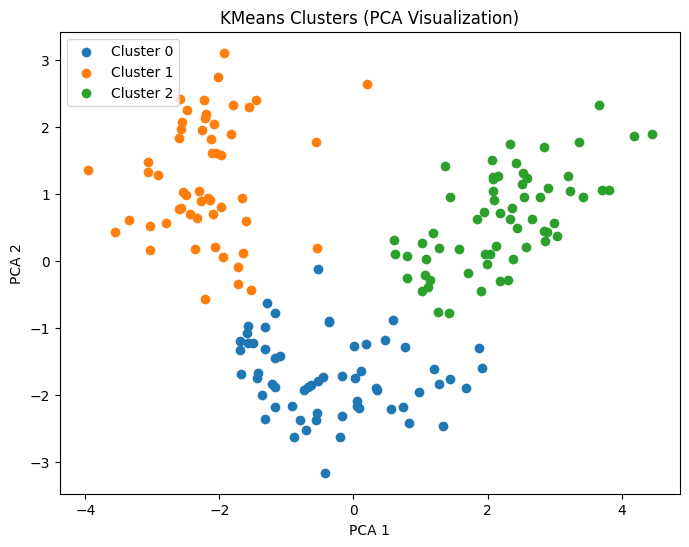

                  Alcohol  Malic_Acid  Ash_Alcanity   Magnesium  \
KMeans_Cluster                                                    
0               12.219180    1.959836     20.452459   90.918033   
1               13.107407    3.191111     21.050000   99.000000   
2               13.665714    1.968254     17.234921  108.920635   

                Total_Phenols  Flavanoids  Proanthocyanins  Color_Intensity  \
KMeans_Cluster                                                                
0                    2.292623    2.160492         1.637541         3.008361   
1                    1.695556    0.836481         1.124630         7.008519   
2                    2.811429    2.924603         1.945397         5.370952   

                   OD280      Proline  
KMeans_Cluster                         
0               2.870656   489.475410  
1               1.702778   627.259259  
2               3.140000  1098.682540  
Silhouette Score with PCA: 0.5612800797676581


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
selected_features = [
    'Alcohol', 'Malic_Acid', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
    'Flavanoids', 'Proanthocyanins', 'Color_Intensity', 'OD280', 'Proline'
]
X = df[selected_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = labels

sil_score = silhouette_score(X_scaled, labels)
print("KMeans Silhouette Score:", sil_score)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
for cluster in range(3):
    plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA 1'), plt.ylabel('PCA 2')
plt.title('KMeans Clusters (PCA Visualization)')
plt.legend()
plt.show()

print(df.groupby('KMeans_Cluster')[selected_features].mean())

#USING PCA to create stronger features by combining them.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans.fit_predict(X_pca)
sil_score_pca = silhouette_score(X_pca, labels_pca)
print("Silhouette Score with PCA:", sil_score_pca)



#Cluster 0: Wines with generally lower alcohol, magnesium, and proline—lighter and less intense profiles.

#Cluster 1: Wines with highest malic acid and color intensity, but lowest phenolics—sharper, less complex tasting.

#Cluster 2: Wines with highest alcohol, phenolics, and proline—richest and most robust profiles.


Best k: 4


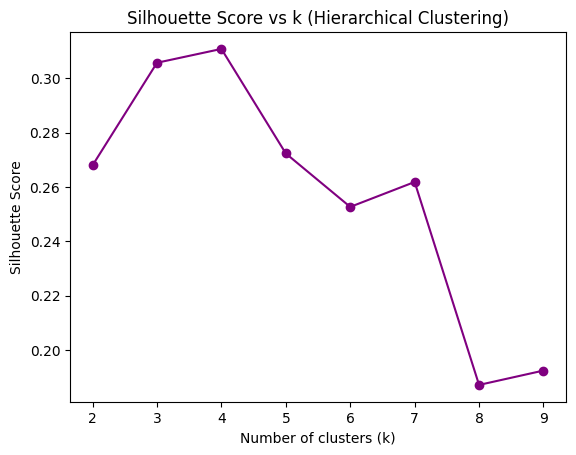

In [53]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

best_k = None
best_score = -1
sil_scores = []
range_n_clusters = range(2, 10)

for k in range_n_clusters:
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    if score > best_score:
        best_score = score
        best_k = k

print("Best k:", best_k)

plt.plot(range_n_clusters, sil_scores, marker='o', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k (Hierarchical Clustering)')
plt.show()


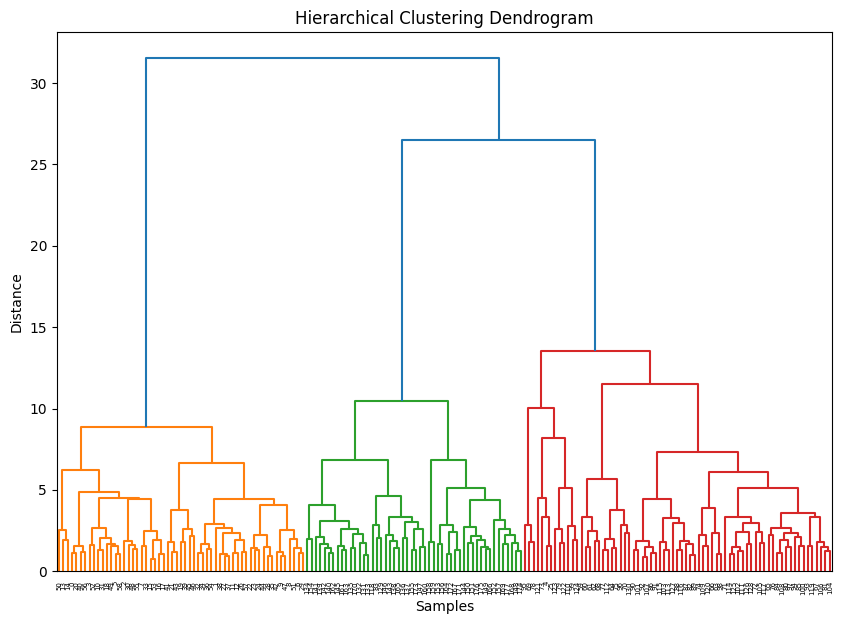

Hierarchical Clustering Silhouette Score: 0.3108222129899324
                        Alcohol  Malic_Acid  Ash_Alcanity   Magnesium  \
Hierarchical_Cluster                                                    
0                     12.266207    1.624828     19.927586   91.672414   
1                     12.433846    2.875385     21.892308  116.538462   
2                     13.127600    3.405200     21.410000   97.800000   
3                     13.765789    1.999825     16.828070  105.824561   

                      Total_Phenols  Flavanoids  Proanthocyanins  \
Hierarchical_Cluster                                               
0                          2.193793    1.984483         1.475000   
1                          2.669231    2.666923         2.390769   
2                          1.689000    0.817000         1.164600   
3                          2.844561    2.992807         1.900351   

                      Color_Intensity     OD280      Proline  
Hierarchical_Cluster        

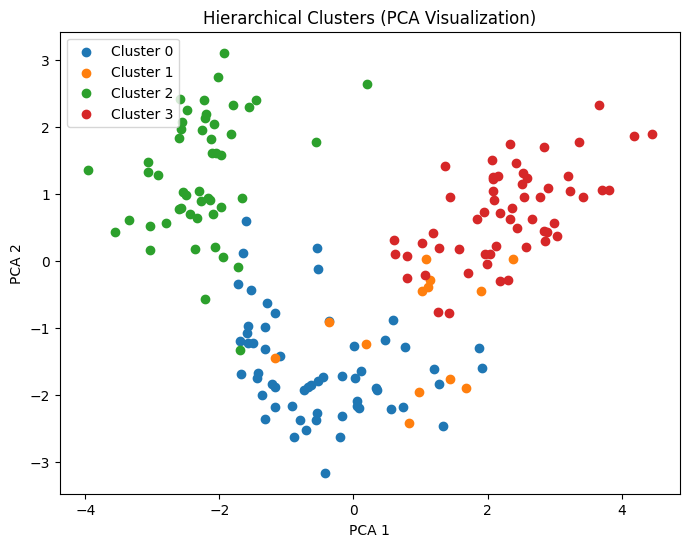

Hierarchical Clustering Silhouette Score with PCA: 0.5212635366381515


In [58]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

n_clusters = 4  
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agg.fit_predict(X_scaled)
df['Hierarchical_Cluster'] = labels

sil_score = silhouette_score(X_scaled, labels)
print("Hierarchical Clustering Silhouette Score:", sil_score)

print(df.groupby('Hierarchical_Cluster')[selected_features].mean())

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
for cluster in range(n_clusters):
    plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA 1'), plt.ylabel('PCA 2')
plt.title('Hierarchical Clusters (PCA Visualization)')
plt.legend()
plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Hierarchical Clustering
hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier = hier.fit_predict(X_pca)
sil_score_hier_pca = silhouette_score(X_pca, labels_hier)
print("Hierarchical Clustering Silhouette Score with PCA:", sil_score_hier_pca)

Best DBSCAN params:
eps: 1.8999999999999997 min_samples: 3
Best Silhouette Score: 0.19595268511199357
Cluster 0: mean values
Alcohol             12.974608
Malic_Acid           1.862059
Ash_Alcanity        18.754902
Magnesium           98.588235
Total_Phenols        2.524412
Flavanoids           2.537157
Proanthocyanins      1.710588
Color_Intensity      4.294608
OD280                3.016471
Proline            814.696078
dtype: float64
Cluster 1: mean values
Alcohol             13.163111
Malic_Acid           3.218000
Ash_Alcanity        20.706667
Magnesium           99.222222
Total_Phenols        1.668889
Flavanoids           0.811333
Proanthocyanins      1.044889
Color_Intensity      7.082444
OD280                1.720222
Proline            628.777778
dtype: float64


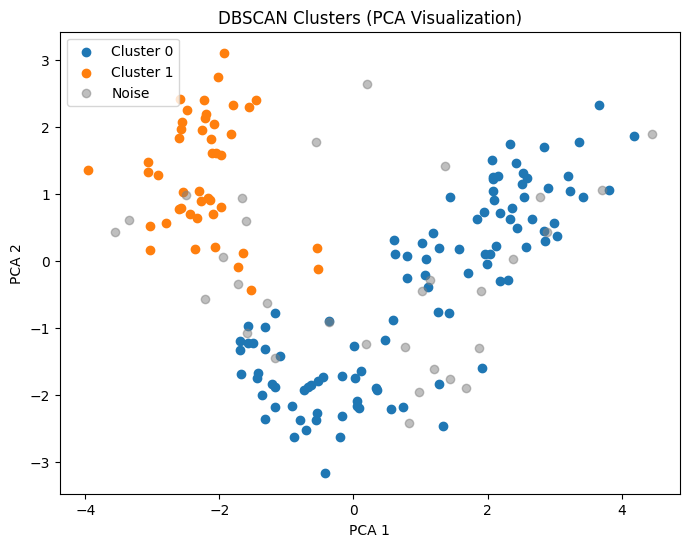

In [ ]:
from sklearn.cluster import DBSCAN

eps_values = np.arange(0.5, 2.0, 0.1)
min_samples_values = [3, 4, 5, 6, 7]
best_score = -1
best_params = (None, None)
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
            results.append((eps, min_samples, n_clusters, score))
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print("Best DBSCAN params:")
print("eps:", best_params[0], "min_samples:", best_params[1])
print("Best Silhouette Score:", best_score)

db = DBSCAN(eps=best_params[0], min_samples=best_params[1])
labels = db.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = labels

for cl in set(labels):
    if cl != -1:
        print(f"Cluster {cl}: mean values")
        print(df[df['DBSCAN_Cluster'] == cl][selected_features].mean())

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
for cl in set(labels):
    if cl != -1:
        plt.scatter(X_pca[labels == cl, 0], X_pca[labels == cl, 1], label=f'Cluster {cl}')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1], label='Noise', color='grey', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clusters (PCA Visualization)')
plt.legend()
plt.show()



Summary:

All clustering scores are weak because of overlap in feature space, not row count or algorithm limitations.

KMeans and Hierarchical are both “best” if results are needed, but interpret cautiously.

“0.3” is a sign of limited natural clustering in your data—this is valuable to report honestly

In [60]:
import joblib
joblib.dump((scaler, pca, kmeans), 'wine_clustering_pipeline.joblib')

['wine_clustering_pipeline.joblib']